In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
images = []
ages = []
genders = []

image_dir = "/Users/SaintKim/Python/Artificial_Intelligence/Deep_Learning/UTKFace/datasets/part1"

for i in os.listdir(image_dir)[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    
    image_path = os.path.join(image_dir, i)
    
    # with 문을 사용하여 파일을 열고 자동으로 닫기
    with Image.open(image_path) as img:
        images.append(img.copy())  # 이미지를 리스트에 복사하여 저장

In [7]:
images = pd.Series(list(images), name='Images')
ages = pd.Series(list(ages), name='Ages')
genders = pd.Series(list(genders), name='Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=368x551 a...,16,1
1,<PIL.Image.Image image mode=RGB size=552x367 a...,40,1
2,<PIL.Image.Image image mode=RGB size=227x300 a...,71,1
3,<PIL.Image.Image image mode=RGB size=236x354 a...,80,1
4,<PIL.Image.Image image mode=RGB size=202x201 a...,21,0
...,...,...,...
7995,<PIL.Image.Image image mode=RGB size=216x155 a...,1,1
7996,<PIL.Image.Image image mode=RGB size=440x280 a...,1,0
7997,<PIL.Image.Image image mode=RGB size=450x300 a...,1,0
7998,<PIL.Image.Image image mode=RGB size=600x337 a...,32,1


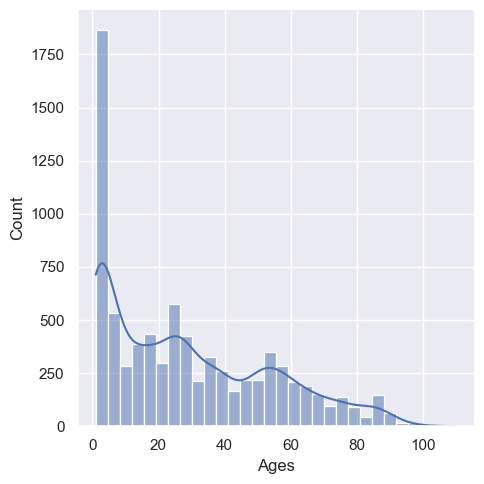

In [8]:
sns.set_theme()
sns.displot(df['Ages'], kde=True, bins=30)

In [9]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])

under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index=True)


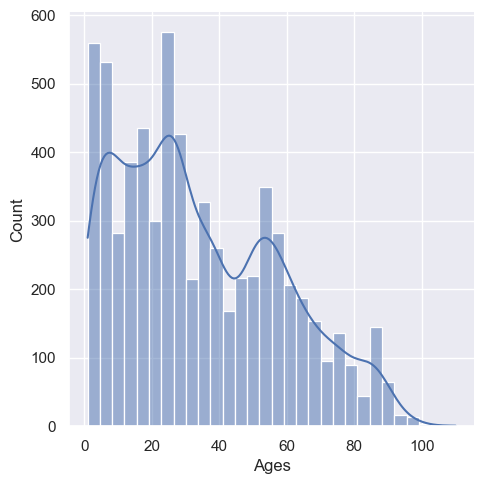

In [10]:
sns.displot(df['Ages'], kde=True, bins=30)

In [13]:
df = df[df['Ages'] < 80]

/var/folders/fq/m61w0f6j0f92zhvm0vln89100000gp/T/ipykernel_77949/4149802094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'], kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

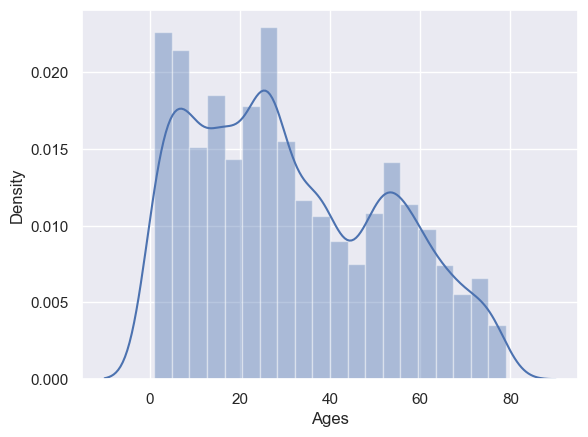

In [14]:
sns.distplot(df['Ages'], kde=True, bins=20)

In [22]:
df['Genders'].value_counts()

1    3530
0    2823
Name: Genders, dtype: int64

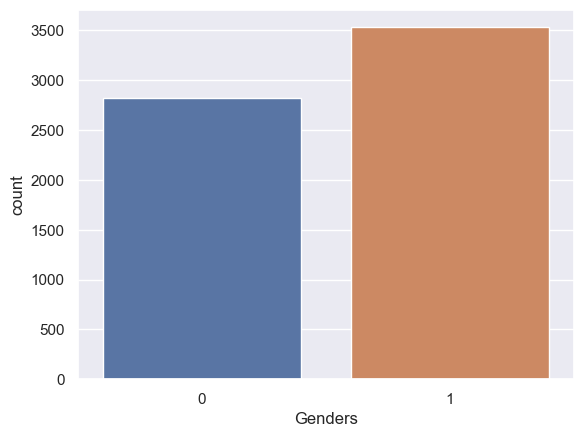

In [27]:
import matplotlib.pyplot as plt

sns.countplot(x='Genders', data=df, order=[0, 1])
plt.show()

In [35]:
x = []
y = []

for i in range(len(df)):
    # 이미지가 올바르게 로드되고 있는지 확인
    image = df['Images'].iloc[i]

    # 이미지가 PIL 이미지인지 확인
    if isinstance(image, Image.Image):
        # 이미지 크기를 200x200으로 조정 및 RGB로 변환
        image = image.resize((200, 200), Image.LANCZOS).convert('RGB')

        # 이미지 데이터를 numpy 배열로 변환
        ar = np.asarray(image)
        
        # 변환된 배열을 리스트에 추가 (배열 크기: 200x200x3)
        x.append(ar)

        # 나이와 성별 데이터를 리스트에 추가
        age_generate = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
        y.append(age_generate)
    else:
        print(f"이미지가 올바르지 않음: {i}")

# 모든 이미지가 (200, 200, 3) 형상을 갖고 있는지 확인 후 numpy 배열로 변환
x = np.array(x)

# 확인용 출력
print(x.shape)  # 출력: (이미지 수, 200, 200, 3)

(6353, 200, 200, 3)


In [37]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, X_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=.2, stratify=y_age)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=.2, stratify=y_gender)

In [38]:
print(df['Genders'].value_counts())

1    3530
0    2823
Name: Genders, dtype: int64


In [39]:
df['Ages'].value_counts()

1     272
26    227
8     191
16    164
5     151
     ... 
77     20
44     20
71     17
74     14
79     12
Name: Ages, Length: 79, dtype: int64

In [41]:
df = df.groupby("Genders").filter(lambda x:len(x) > 1)
df = df.groupby("Ages").filter(lambda x:len(x) > 1)

,Images,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=200x200 a...,16,1
1,<PIL.Image.Image image mode=RGB size=200x200 a...,40,1
2,<PIL.Image.Image image mode=RGB size=200x200 a...,71,1
4,<PIL.Image.Image image mode=RGB size=200x200 a...,21,0
5,<PIL.Image.Image image mode=RGB size=200x200 a...,6,1
...,...,...,...
6689,<PIL.Image.Image image mode=RGB size=200x200 a...,3,0
6690,<PIL.Image.Image image mode=RGB size=200x200 a...,2,0
6691,<PIL.Image.Image image mode=RGB size=200x200 a...,1,0
6692,<PIL.Image.Image image mode=RGB size=200x200 a...,1,0
